# 苹果转橘子

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import glob
%matplotlib inline

H:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Generator

In [3]:
def generator(inputs_real, is_train=True, alpha=0.01, name="generator"):
    # 256*256*3
    with tf.variable_scope(name, reuse=(not is_train)):
        # 128*128*64
        conv1 = tf.layers.conv2d(inputs_real, 64, (3,3), padding='same')
        conv1 = tf.nn.relu(conv1)
        conv1 = tf.layers.max_pooling2d(conv1, (2,2), (2,2), padding='same')
        # 64*64*128
        conv2 = tf.layers.conv2d(conv1, 128, (3,3), padding='same')
        conv2 = tf.nn.relu(conv2)
        conv2 = tf.layers.max_pooling2d(conv2, (2,2), (2,2), padding='same')
        # 32*32*256
        conv3 = tf.layers.conv2d(conv2, 256, (3,3), padding='same')
        conv3 = tf.nn.relu(conv3)
        conv3 = tf.layers.max_pooling2d(conv3, (2,2), (2,2), padding='same')
        # 16*16*512
        conv4 = tf.layers.conv2d(conv3, 512, (3,3), padding='same')
        conv4 = tf.nn.relu(conv4)
        conv4 = tf.layers.max_pooling2d(conv4, (2,2), (2,2), padding='same')
        # 8*8*512
        conv5 = tf.layers.conv2d(conv4, 512, (3,3), padding='same')
        conv5 = tf.nn.relu(conv5)
        conv5 = tf.layers.max_pooling2d(conv5, (2,2), (2,2), padding='same')
        # 4*4*512
        conv6 = tf.layers.conv2d(conv5, 512, (3,3), padding='same')
        conv6 = tf.nn.relu(conv6)
        conv6 = tf.layers.max_pooling2d(conv6, (2,2), (2,2), padding='same')
        # 2*2*512
        conv7 = tf.layers.conv2d(conv6, 512, (3,3), padding='same')
        conv7 = tf.nn.relu(conv7)
        conv7 = tf.layers.max_pooling2d(conv7, (2,2), (2,2), padding='same')
        # 1*1*512
        conv8 = tf.layers.conv2d(conv7, 512, (3,3), padding='same')
        conv8 = tf.nn.relu(conv8)
        conv8 = tf.layers.max_pooling2d(conv8, (2,2), (2,2), padding='same')
        
        
        # 2*2*512
        conv9 = tf.layers.conv2d_transpose(conv8, 512, 3, strides=2, padding='same')
        conv9 = tf.layers.batch_normalization(conv9, training=is_train)
        conv9 = tf.nn.relu(conv9)
        conv9 = tf.nn.dropout(conv9, keep_prob=0.5)
        # 4*4*512
        conv10 = tf.concat([conv9,conv7], 3)
        conv10 = tf.layers.conv2d_transpose(conv10, 512, 3, strides=2, padding='same')
        conv10 = tf.layers.batch_normalization(conv10, training=is_train)
        conv10 = tf.nn.relu(conv10)
        conv10 = tf.nn.dropout(conv10, keep_prob=0.5)
        # 8*8*512
        conv11 = tf.concat([conv10,conv6], 3)
        conv11 = tf.layers.conv2d_transpose(conv11, 512, 3, strides=2, padding='same')
        conv11 = tf.layers.batch_normalization(conv11, training=is_train)
        conv11 = tf.nn.relu(conv11)
        conv11 = tf.nn.dropout(conv11, keep_prob=0.5)
        # 16*16*512
        conv12 = tf.concat([conv11,conv5], 3)
        conv12 = tf.layers.conv2d_transpose(conv12, 512, 3, strides=2, padding='same')
        conv12 = tf.layers.batch_normalization(conv12, training=is_train)
        conv12 = tf.nn.relu(conv12)
        # 32*32*256
        conv13 = tf.concat([conv12,conv4], 3)
        conv13 = tf.layers.conv2d_transpose(conv13, 256, 3, strides=2, padding='same')
        conv13 = tf.layers.batch_normalization(conv13, training=is_train)
        conv13 = tf.nn.relu(conv13)
        # 64*64*128
        conv14 = tf.concat([conv13,conv3], 3)
        conv14 = tf.layers.conv2d_transpose(conv14, 128, 3, strides=2, padding='same')
        conv14 = tf.layers.batch_normalization(conv14, training=is_train)
        conv14 = tf.nn.relu(conv14)
        # 128*128*64
        conv15 = tf.concat([conv14,conv2], 3)
        conv15 = tf.layers.conv2d_transpose(conv15, 64, 3, strides=2, padding='same')
        conv15 = tf.layers.batch_normalization(conv15, training=is_train)
        conv15 = tf.nn.relu(conv15)
        # 256*256*3
        conv16 = tf.concat([conv15,conv1], 3)
        conv16 = tf.layers.conv2d_transpose(conv16, 3, 3, strides=2, padding='same')
#        conv16 = tf.layers.batch_normalization(conv16, training=is_train)
    
        # 图片归一化
        outputs = tf.nn.tanh(conv16)
        
        return outputs

## Discriminator

In [4]:
def discriminator(inputs_image, reuse=False, alpha=0.01, name="discriminator"):
    
    with tf.variable_scope(name, reuse=reuse):
        

        layer1 = tf.layers.conv2d(inputs_image, 64, 3, strides=2, padding='same')
        layer1 = tf.layers.batch_normalization(layer1, training=True)
        layer1 = tf.maximum(alpha * layer1, layer1)
        
        layer2 = tf.layers.conv2d(layer1, 64, 3, strides=2, padding='same')
        layer2 = tf.layers.batch_normalization(layer2, training=True)
        layer2 = tf.maximum(alpha * layer2, layer2)
        
        layer3 = tf.layers.conv2d(layer2, 128, 3, strides=2, padding='same')
        layer3 = tf.layers.batch_normalization(layer3, training=True)
        layer3 = tf.maximum(alpha * layer3, layer3)
        
        layer4 = tf.layers.conv2d(layer3, 128, 3, strides=2, padding='same')
        layer4 = tf.layers.batch_normalization(layer4, training=True)
        layer4 = tf.maximum(alpha * layer4, layer4)
        
        layer5 = tf.layers.conv2d(layer4, 256, 3, strides=2, padding='same')
        layer5 = tf.layers.batch_normalization(layer5, training=True)
        layer5 = tf.maximum(alpha * layer5, layer5)
        
        layer6 = tf.layers.conv2d(layer5, 256, 3, strides=2, padding='same')
        layer6 = tf.layers.batch_normalization(layer6, training=True)
        layer6 = tf.maximum(alpha * layer6, layer6)
        
        layer7 = tf.layers.conv2d(layer6, 512, 3, strides=2, padding='same')
        layer7 = tf.layers.batch_normalization(layer7, training=True)
        layer7 = tf.maximum(alpha * layer7, layer7)
        
        flatten = tf.reshape(layer7, (-1, 2*2*512))
        logits = tf.layers.dense(flatten, 1)
        outputs = tf.sigmoid(logits)
        
        return  logits, outputs

## Loss

In [5]:
def get_loss(inputs_images, inputs_cartoons, smooth=0.1):
    
    
    fake_cartoons = generator(inputs_images, name="generatorI2C")
    fake_images_ = generator(fake_cartoons, name="generatorC2I")
    fake_images = generator(inputs_cartoons, False, name="generatorC2I")
    fake_cartoons_ = generator(fake_images, False, name="generatorI2C")

    discriminator_cartoon_fake, cartoon_fake_logits = discriminator(fake_cartoons, reuse=False, name="discriminator_cartoon")
    discriminator_image_fake, image_fake_logits = discriminator(fake_images, reuse=False, name="discriminator_image")
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=cartoon_fake_logits, 
                                                                    labels=tf.ones_like(discriminator_cartoon_fake)*(1-smooth))) \
            + tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=image_fake_logits,
                                                                    labels=tf.ones_like(discriminator_image_fake)*(1-smooth))) \
            + tf.reduce_mean(tf.abs(inputs_images - fake_images_))\
            + tf.reduce_mean(tf.abs(inputs_cartoons - fake_cartoons_))
            
            
    
    discriminator_cartoon_real, cartoon_real_logits = discriminator(inputs_cartoons, reuse=True, name="discriminator_cartoon")
    discriminator_image_real, image_real_logits = discriminator(inputs_images, reuse=True, name="discriminator_image")
    
    d_cartoon_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=cartoon_real_logits, 
                                                                                 labels=tf.ones_like(discriminator_cartoon_real)*(1-smooth)))
    d_image_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=image_real_logits, 
                                                                                 labels=tf.ones_like(discriminator_image_real)*(1-smooth)))
    d_cartoon_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=cartoon_fake_logits, 
                                                                                 labels=tf.zeros_like(discriminator_cartoon_fake)*(1-smooth)))
    d_image_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=image_fake_logits, 
                                                                                 labels=tf.zeros_like(discriminator_image_fake)*(1-smooth)))
    
    d_loss = d_cartoon_real_loss + d_image_real_loss + d_cartoon_fake_loss + d_image_fake_loss

    
    return g_loss, d_loss

## Optimizer

In [6]:
def get_optimizer(g_loss, d_loss, g_loss_tran, learning_rate=0.0001):
    
    train_vars = tf.trainable_variables()
    
    g_vars = [var for var in train_vars if var.name.startswith("generator")]
    d_vars = [var for var in train_vars if var.name.startswith("discriminator")]
    
    
    # Optimizer
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        g_opt = tf.train.AdamOptimizer(learning_rate*5).minimize(g_loss, var_list=g_vars)
        d_opt = tf.train.AdamOptimizer(learning_rate).minimize(d_loss, var_list=d_vars)
    
    return g_opt, d_opt

## 辅助函数，用来在迭代中显示图片

In [7]:
def plot_images(samples):
    samples = (samples + 1) / 2
    fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(10,1))
    for img, ax in zip(samples, axes):
        ax.imshow(img)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    fig.tight_layout(pad=0)

In [8]:
def show_generator_output(sess, samp_images):
    samples = sess.run(generator(samp_images, False , name="generatorI2C"))
    samples = sess.run(tf.reshape(samples, [-1, 256, 256, 3]))
    return samples

## Train

In [9]:
# 定义参数
beta1 = 0.4
learning_rate = 0.0001

In [10]:
def train():
    
    # 存储loss
    losses = []
    steps = 1000
    
    apple_list = glob.glob('./apple2orange/trainA/*.jpg')
    orange_list = glob.glob('./apple2orange/trainB/*.jpg')
    image_que = tf.train.slice_input_producer([apple_list, orange_list], shuffle=True)
    
    image_ = tf.read_file(image_que[0])
    image = tf.image.decode_jpeg(image_, channels=3)
    image = tf.image.resize_image_with_crop_or_pad(image, 256, 256)
    new_img = tf.image.convert_image_dtype(image, tf.float32)
    new_img = new_img*2 -1
    
    cartoon_ = tf.read_file(image_que[1])
    cartoon = tf.image.decode_jpeg(cartoon_, channels=3)
    cartoon = tf.image.resize_image_with_crop_or_pad(cartoon, 256, 256)
    new_cartoon = tf.image.convert_image_dtype(cartoon, tf.float32)
    new_cartoon = new_cartoon*2 -1
    
    batch_size = 10
    capacity = 3 + 2 * batch_size
          
    image_batch, cartoon_batch = tf.train.batch([new_img, new_cartoon], batch_size=batch_size, capacity=capacity)
    
    g_loss, d_loss = get_loss(image_batch, cartoon_batch)
    g_train_opt, d_train_opt = get_optimizer(g_loss, d_loss, beta1, learning_rate)
    
    
    saver = tf.train.Saver()
#    model_file=tf.train.latest_checkpoint('../input/cycel-apple-to-orange')
    with tf.Session() as sess:
#        saver.restore(sess, model_file)
        coord = tf.train.Coordinator()
        threads = tf.train.start_queue_runners(coord=coord)
        sess.run(tf.global_variables_initializer())
        
        
        # 迭代epoch
        
        for e in range(steps):
                # run optimizer
            _ = sess.run(d_train_opt)
            _ = sess.run(g_train_opt)
                
            if e % 100 == 0:
#                saver.save(sess,'./less96', global_step = e)
                train_loss_d = d_loss.eval()
                train_loss_g = g_loss.eval()
                losses.append((train_loss_d, train_loss_g))
                    # 显示图片
                samples = show_generator_output(sess, image_batch)
                plot_images(samples)
                print("Epoch {}/{}....".format(e+1, steps), 
                     "Discriminator Loss: {:.4f}....".format(train_loss_d),
                     "Generator Loss: {:.4f}....". format(train_loss_g))
        saver.save(sess,'./less96',global_step = steps)
        coord.request_stop()
        coord.join(threads)                  

Epoch 1/1000.... Discriminator Loss: 2.9407.... Generator Loss: 2.3714....
Epoch 101/1000.... Discriminator Loss: 2.7470.... Generator Loss: 1.8382....
Epoch 201/1000.... Discriminator Loss: 2.6516.... Generator Loss: 1.6317....
Epoch 301/1000.... Discriminator Loss: 2.6107.... Generator Loss: 1.5520....
Epoch 401/1000.... Discriminator Loss: 2.6936.... Generator Loss: 1.5697....
Epoch 501/1000.... Discriminator Loss: 2.4914.... Generator Loss: 1.5345....
Epoch 601/1000.... Discriminator Loss: 2.4656.... Generator Loss: 1.5393....
Epoch 701/1000.... Discriminator Loss: 2.4099.... Generator Loss: 1.5304....
Epoch 801/1000.... Discriminator Loss: 2.3221.... Generator Loss: 1.4708....
Epoch 901/1000.... Discriminator Loss: 2.3139.... Generator Loss: 1.5180....


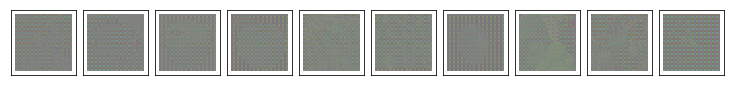

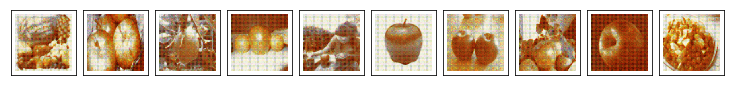

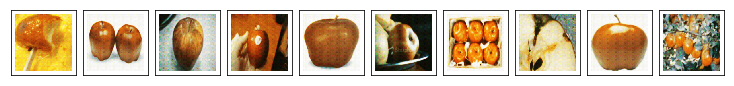

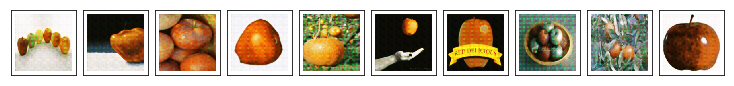

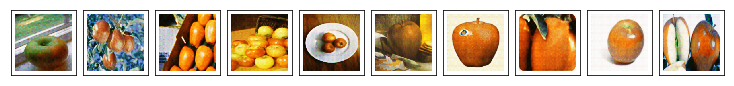

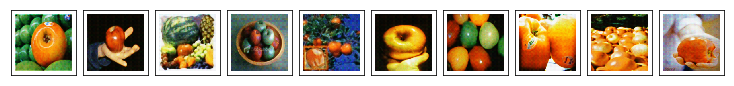

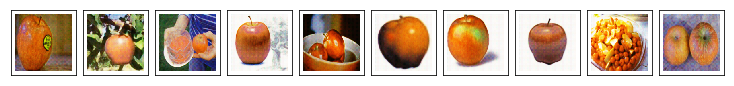

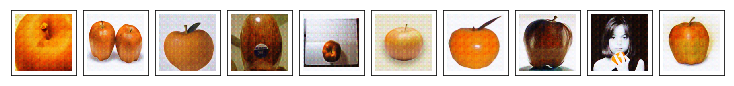

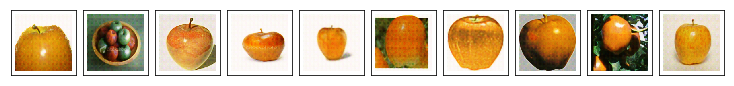

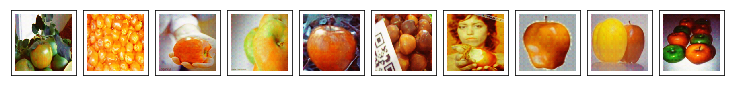

In [11]:
with tf.Graph().as_default():
    train()